### Import Libraries

In [ ]:
# Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt
from datetime import datetime

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
# Loading Zomato Restaurant names and Metadata Dataset 
hotel=pd.read_csv('/content/drive/MyDrive/Capston Project/Unsupervised ML/Zomato Restaurant names and Metadata.csv')

#Loading Zomato Restaurant reviews Dataset
review=pd.read_csv('/content/drive/MyDrive/Capston Project/Unsupervised ML/Zomato Restaurant reviews.csv')

### Dataset First View

In [ ]:
# hotel First Look
hotel.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
# review First Look
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
hotel.shape

(105, 6)

In [ ]:
# Dataset Rows & Columns count
review.shape

(10000, 7)

Hotel contains 105 records and 6 features while review dataset contains 10000 records and 7 features.

### Dataset Information

In [ ]:
# metadata Dataset Info
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Cost must be int type but it contains comma(,) , hence its datatype is object here.
Also Timings represent the time from when the restaurant opens till end time when restaurants shut down, ut it is given in the form of text, hence object datatype.

In [ ]:
# review Dataset Info
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
#hotel Dataset Duplicate Value Count
print(len(hotel[hotel.duplicated()]))

0


In [ ]:
#review Dataset Duplicate Value Count
print(len(review[review.duplicated()]))

36


There are some duplicate values in review dataset. Let's find out more about this.

In [ ]:
#Check what are dplicated values present in the dataset
review[review.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


Since all the duplicated rows are null values. Hence we can drop them.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count in hotel
hotel.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

<Axes: >

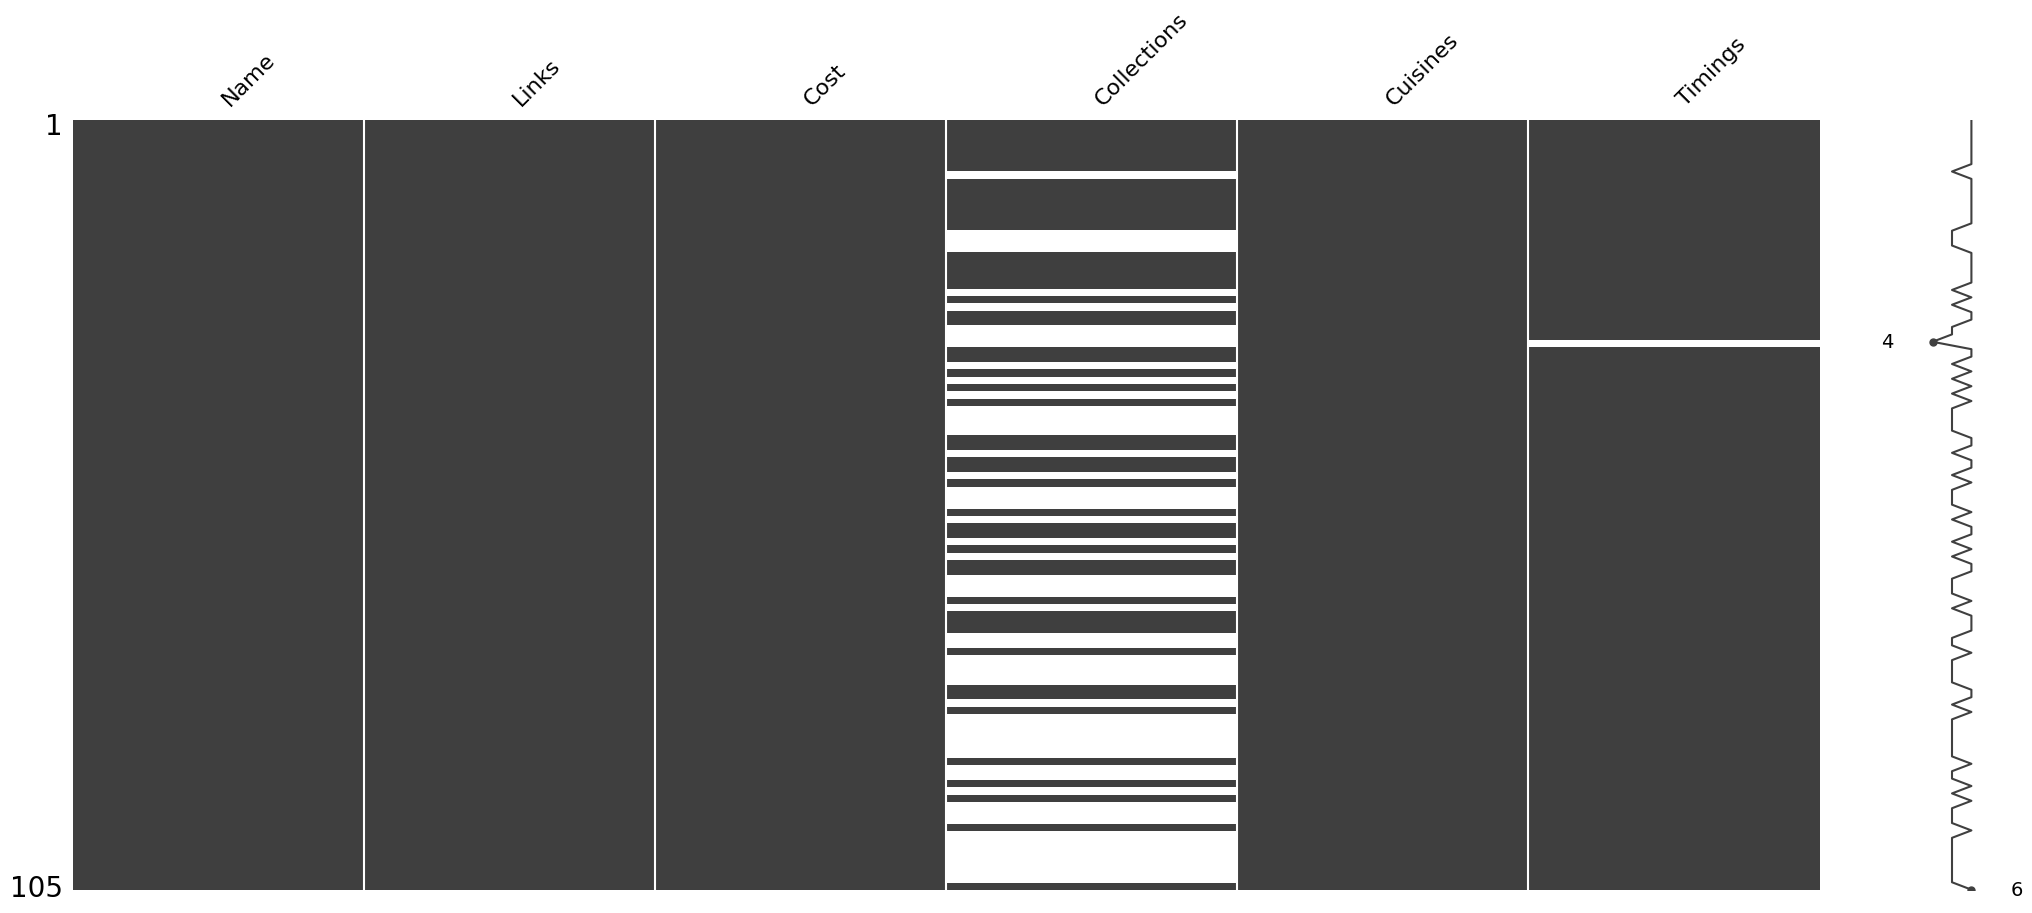

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(hotel)

In [ ]:
hotel[hotel['Timings'].isnull()]

,Name,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


There are some missing values in the column collections a, i.e., 54 and one in Timings column( this include one of the 54 records missing in collections).

In [ ]:
# Missing Values/Null Values Count in review
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

<Axes: >

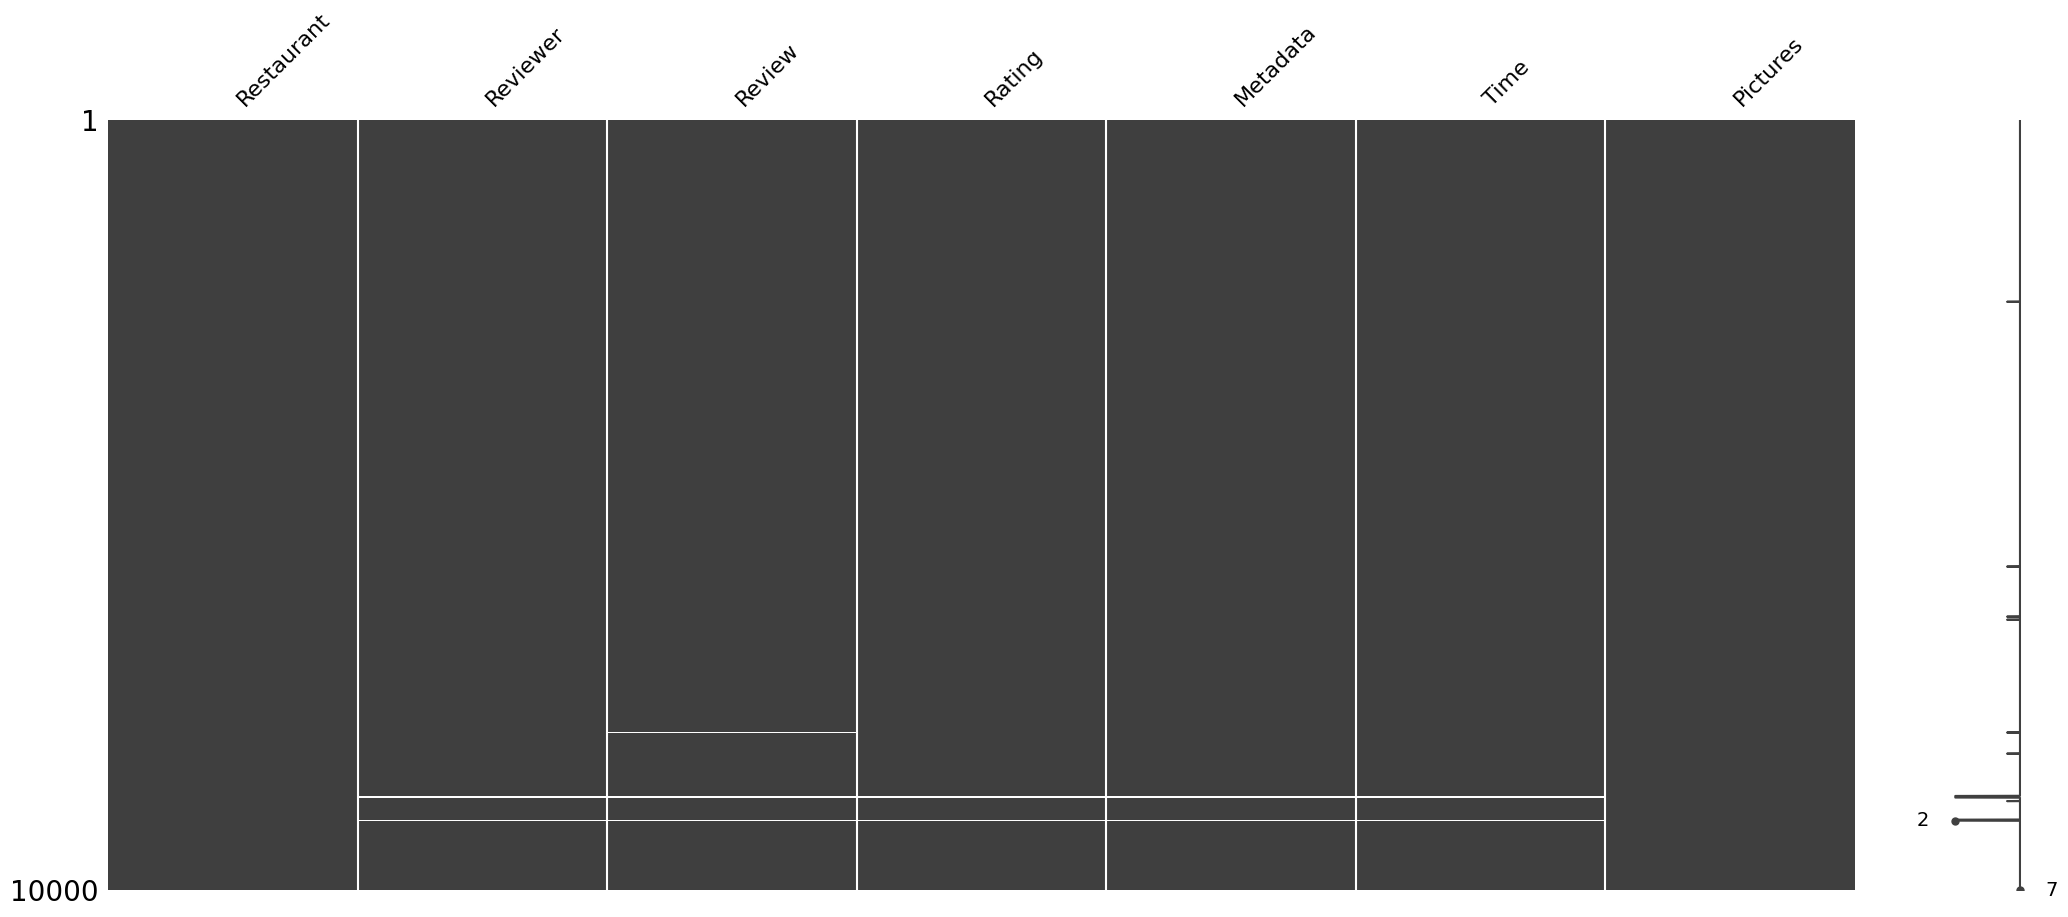

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.matrix(review)

In reviews dataset, most of the columns have missing values.

## ***2. Understanding Your Variables***

In [ ]:
# hotel dataset Columns
hotel.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# review Dataset Columns
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
hotel.describe(include='all').T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


Here none of the columns are seemed to be categorical.

In [ ]:
#describe review dataset
review.describe(include='all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description 

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable in hotel.
for col in hotel.columns:
  print("Column:",col,"\n",hotel[col].nunique())
  print('--'*70)

Column: Name 
 105
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Links 
 105
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Cost 
 29
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Collections 
 42
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Cuisines 
 92
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Timings 
 77
--------------------------------------------------------------------------------------------------------------------------------------------


There are total of 105 restaurant information available along with their websites.

In [ ]:
# Check Unique Values for each variable in review.
for col in review.columns:
  print("Column:",col,"\n",review[col].nunique())
  print('--'*70)

Column: Restaurant 
 100
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Reviewer 
 7446
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Review 
 9364
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Rating 
 10
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Metadata 
 2477
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Time 
 9782
--------------------------------------------------------------------------------------------------------------------------------------------
Column: Pictures 
 

In [ ]:
# Check Unique Values for rating variable.

'''
We can check for unique value of Ratings given by customers
'''

print("Column:",'Rating',"\n",review['Rating'].unique())  

Column: Rating 
 ['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]


The ratings are given by customer as 1,1.5,2,2.5,...5  and 'like' while there are some missing values. 
* We can replace the missing value with median of that particular restaurant.
* Also We know that 'like' is not a rating and replacing it with rating 4 (Because rating 4 can be considered as people like the taste)

## 3. ***Data Wrangling***

### Data Wrangling Code

###1. Review dataset

In [ ]:
# Dropping the duplicate values in reviews df
review.drop_duplicates(keep=False,inplace=True)

In [ ]:
# Replace Rating 'Like' with rating 4
review['Rating']=review['Rating'].str.replace("Like",'4').astype('float')

Now there are null values just in 'Review' column.

---
We can drop records which have null values in Review column.



In [ ]:
#splitting the metadata into Reviews and Followers
review['No_of_reviews'],review['Followers'] = review['Metadata'].str.split(',').str
review['No_of_reviews'] = pd.to_numeric(review['No_of_reviews'].str.split(' ').str[0])
review['Followers'] = pd.to_numeric(review['Followers'].str.split(' ').str[1])
review

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,No_of_reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0,3,2.0
...,...,...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",6/5/2016 0:08,0,53,54.0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0,2,53.0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3,65,423.0
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",5/31/2016 17:22,0,13,144.0


In [ ]:
# Filling the null values of Followes with 0
review['Followers'].fillna(0,inplace=True)

In [ ]:
# Converting Time to date time and extracting Hour and year 
review['Time']=pd.to_datetime(review['Time'])
review['Year']=pd.DatetimeIndex(review['Time']).year
review['Hour'] = pd.DatetimeIndex(review['Time']).hour  

In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Restaurant     9962 non-null   object        
 1   Reviewer       9962 non-null   object        
 2   Review         9955 non-null   object        
 3   Rating         9962 non-null   float64       
 4   Metadata       9962 non-null   object        
 5   Time           9962 non-null   datetime64[ns]
 6   Pictures       9962 non-null   int64         
 7   No_of_reviews  9962 non-null   int64         
 8   Followers      9962 non-null   float64       
 9   Year           9962 non-null   int64         
 10  Hour           9962 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 933.9+ KB


###2. Hotel dataset

In [ ]:
# Renaming the hotel dataset column name
hotel.rename(columns={'Name':'Restaurant'},inplace=True)

In [ ]:
# checking values for cost
hotel['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [ ]:
# Removing ',' from Cost in hotel
hotel['Cost']=hotel['Cost'].str.replace(",","").astype("int64")

In [ ]:
# Get the function for number of cuisine in a hotel
def get_no_of_cuisine(cuisine):
  Cuisine_list=list(str(cuisine).split(','))
  return len(Cuisine_list)

# Create a new column with no of cuisine in hotel dataframe
hotel['No_of_cuisine']=hotel['Cuisines'].apply(get_no_of_cuisine)

In [ ]:
# Create a new column for average rating in hotel dataset
Average_rating = review.groupby(by='Restaurant',as_index='False')['Rating'].mean().reset_index()
Average_rating.rename(columns={'Rating':'Average_rating'},inplace = True)
Average_rating

,Restaurant,Average_rating
0,10 Downing Street,3.80
1,13 Dhaba,3.48
2,"3B's - Buddies, Bar & Barbecue",4.76
3,AB's - Absolute Barbecues,4.88
4,Absolute Sizzlers,3.62
...,...,...
95,Urban Asia - Kitchen & Bar,3.65
96,Yum Yum Tree - The Arabian Food Court,3.56
97,Zega - Sheraton Hyderabad Hotel,4.45
98,Zing's Northeast Kitchen,3.65


In [ ]:
# Let's merge the average rating with hotel dataset
hotel = hotel.merge(Average_rating,on = 'Restaurant')

In [ ]:
# Let's merge the two dataset
df = hotel.merge(review, on = 'Restaurant')
df.shape

(9962, 18)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: ylabel='Cost'>

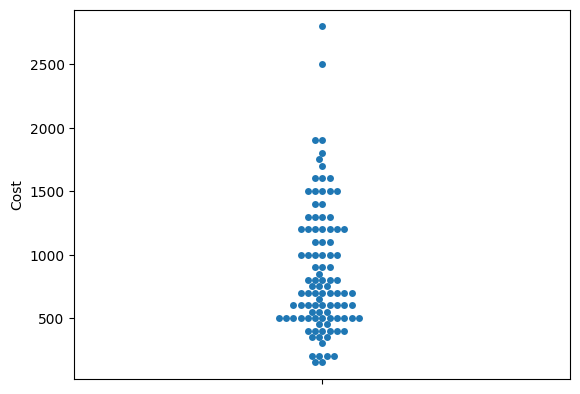

In [ ]:
# Let's now plot the swarmplot to see the variation in price 
sns.swarmplot(hotel['Cost'])

#### Chart - 2

In [ ]:
#Find out the costliest restaurants
costly_res=hotel[['Restaurant','Cost']].groupby('Restaurant',as_index=False).mean().sort_values(by='Cost',ascending=False).head(10).reset_index(drop=True)
costly_res

,Restaurant,Cost
0,Collage - Hyatt Hyderabad Gachibowli,2800.0
1,Feast - Sheraton Hyderabad Hotel,2500.0
2,10 Downing Street,1900.0
3,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
4,Cascade - Radisson Hyderabad Hitec City,1800.0
5,Zega - Sheraton Hyderabad Hotel,1750.0
6,Mazzo - Marriott Executive Apartments,1700.0
7,B-Dubs,1600.0
8,Arena Eleven,1600.0
9,Barbeque Nation,1600.0


In [ ]:
#Find out the cheapest restaurants
cheapest_res = hotel[['Restaurant','Cost']].groupby('Restaurant',as_index=False).mean().sort_values(by='Cost',ascending=True).head(10).reset_index(drop=True)
cheapest_res

,Restaurant,Cost
0,Amul,150.0
1,Mohammedia Shawarma,150.0
2,Hunger Maggi Point,200.0
3,KS Bakers,200.0
4,Momos Delight,200.0
5,Asian Meal Box,200.0
6,Shah Ghouse Spl Shawarma,300.0
7,Cream Stone,350.0
8,The Old Madras Baking Company,350.0
9,Tempteys,350.0


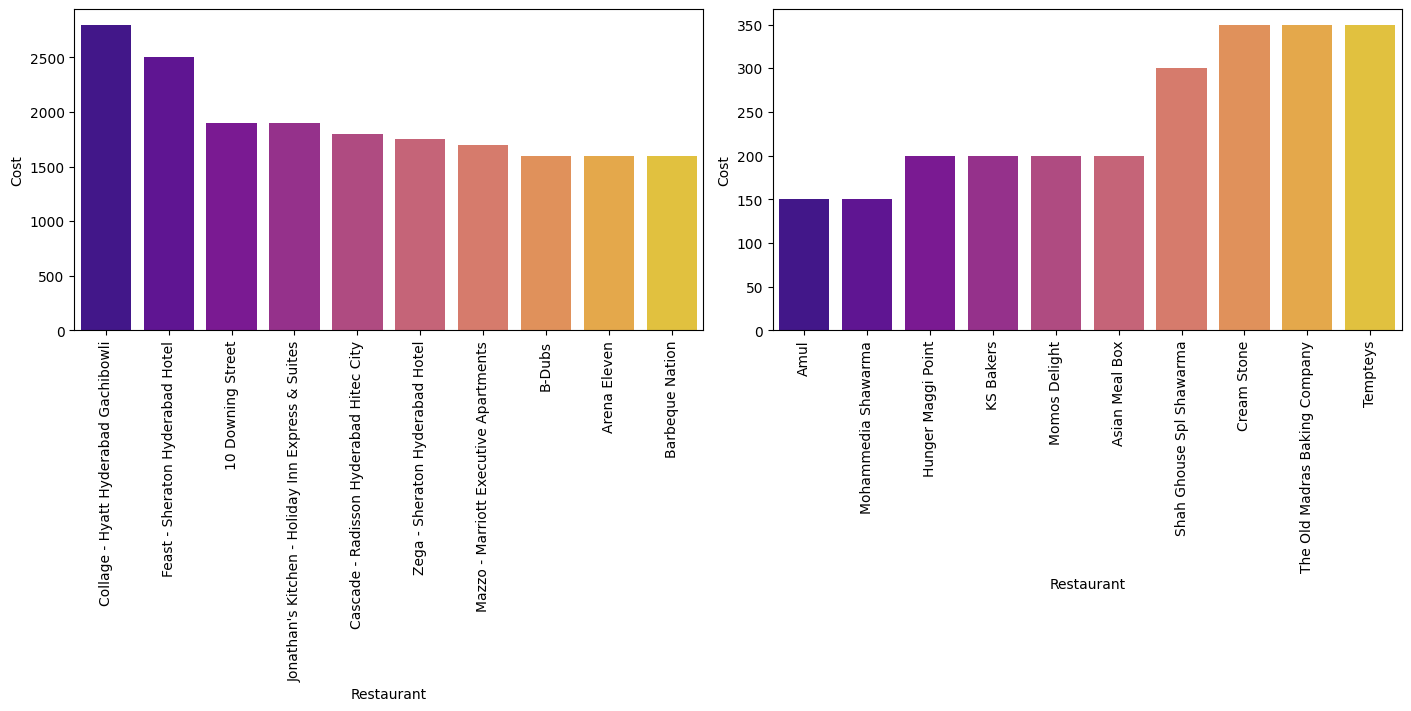

In [ ]:
#visualisation of most expensive and cheapest restaurant
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

#costliest restaurant
a=sns.barplot(x = 'Restaurant',y = 'Cost',data = costly_res,ax = axes[0],palette = 'plasma')
a.set_xticklabels(labels=costly_res['Restaurant'].to_list(),rotation=90)

#cheapest restaurant
b=sns.barplot(x = 'Restaurant',y = 'Cost',data = cheapest_res,ax = axes[1],palette = 'plasma')
b.set_xticklabels(labels=cheapest_res['Restaurant'].to_list(),rotation=90)
plt.show()

#### Chart - 3

(-0.5, 1999.5, 1999.5, -0.5)

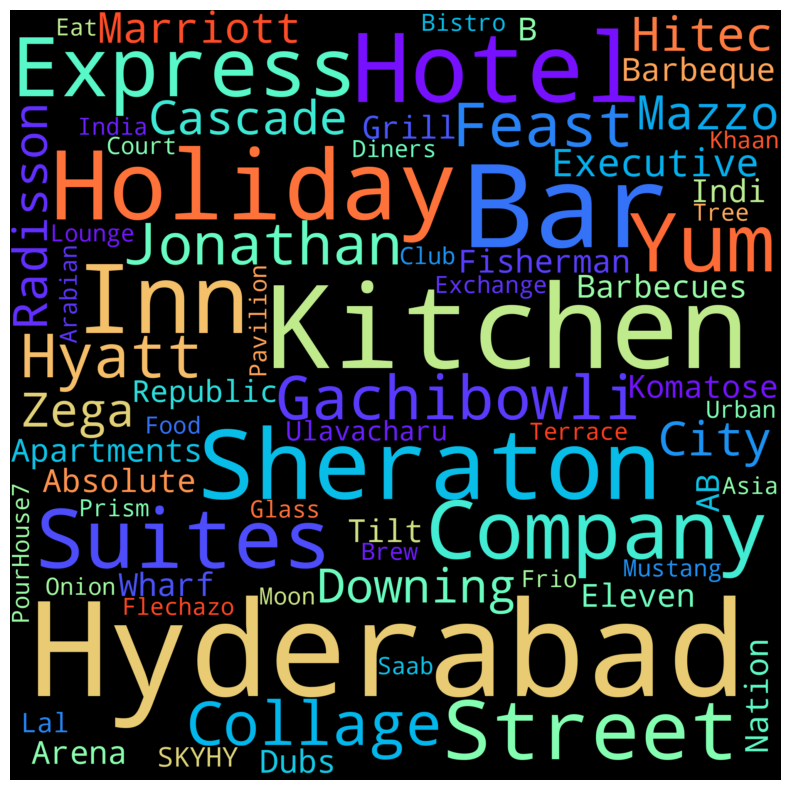

In [ ]:
#CREATING WORDCLOUD FOR EXPENSIVE RESTAURANT
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=False).Restaurant[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 2000, height = 2000,collocations = False,
                       colormap='rainbow',background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear');
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

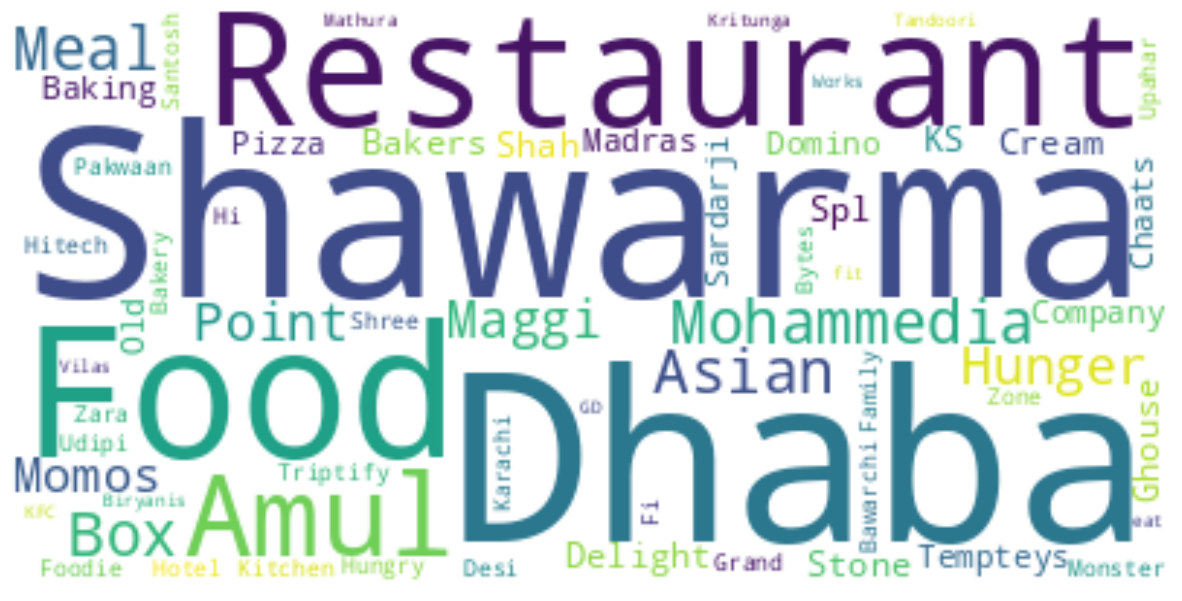

In [ ]:
#CREATING WORDCLOUD FOR CHEAPEST RESTAURANT
plt.figure(figsize=(15,8))
text = " ".join(name for name in hotel.sort_values('Cost',ascending=True).Restaurant[:30])

# Creating word_cloud with text as argument in .generate() method
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated Word Cloud
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis("off")

#### Chart - 4

In [ ]:
#See the average rating and total number of review given to the restaurants

avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100
...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100
96,Yum Yum Tree - The Arabian Food Court,3.56,100
97,Zega - Sheraton Hyderabad Hotel,4.45,100
98,Zing's Northeast Kitchen,3.65,100


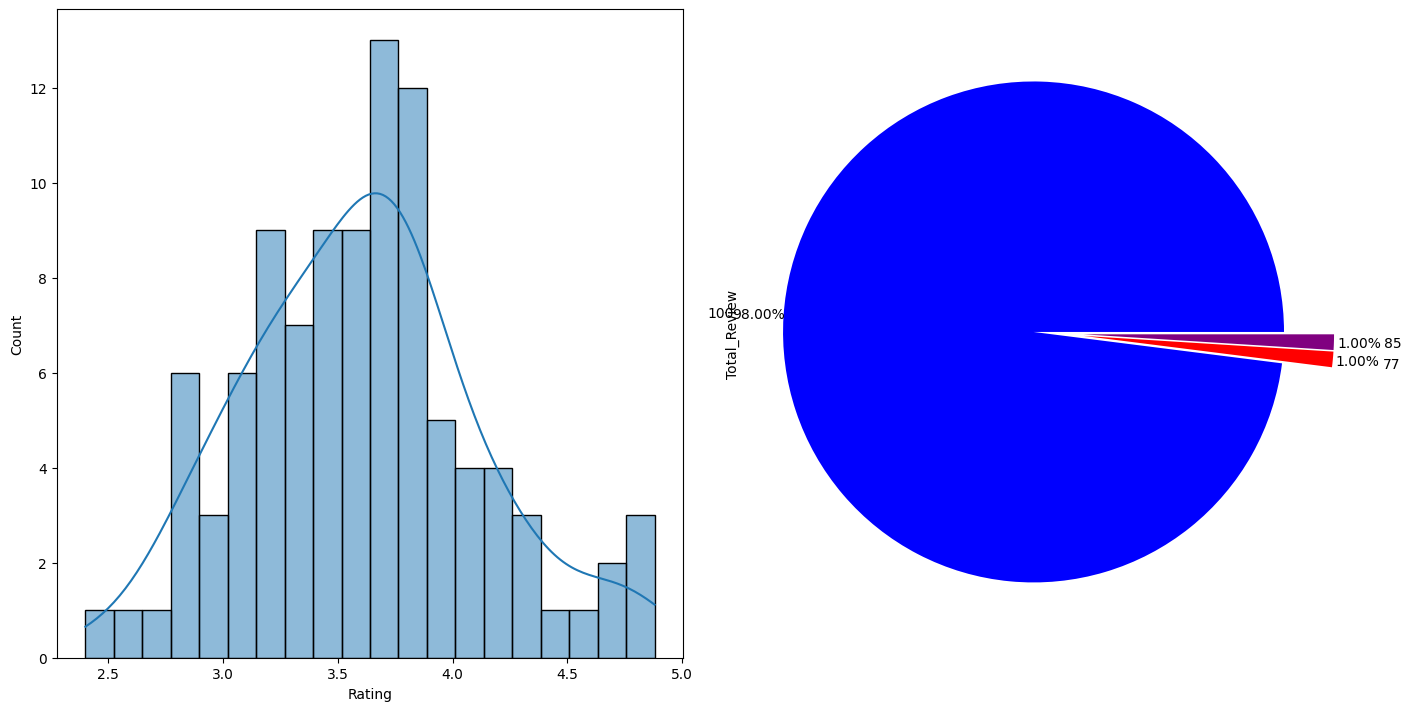

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,constrained_layout=True,figsize=(14,7))

# Let's see te histogram of average rating
a=sns.histplot(data=avg_hotel_rating['Rating'],bins=20,kde=True,ax=axes[0])

# plot the pie chart of number of reveivers for restaurants
b=avg_hotel_rating['Total_Review'].value_counts().plot(kind='pie', shadow=False, autopct='%1.2f%%',
                                                       explode = (0.1, 0.1, 0.1),pctdistance=1.1,labeldistance=1.2,
                                                       colors=['Blue','red','purple'],ax=axes[1])
plt.show()

#### Chart - 5

In [ ]:
#Most popular cuisines
cuisine_list=[]
cuisines=hotel.Cuisines.str.split(',')

#Get all the cuuisines in a list
for i in cuisines:
  for j in i:
    cuisine_list.append(j)

# converting it to dataframe
cuisine_series=pd.Series(cuisine_list)
cuisine_df=pd.DataFrame(cuisine_series,columns=['Cuisines'])
cuisine_df[cuisine_df['Cuisines']==' North Indian']='North Indian'

In [ ]:
#Let's Find the count of each cuisine
cuisine_=pd.DataFrame(cuisine_df.groupby(by='Cuisines',as_index=False).value_counts())
cuisine_

,Cuisines,count
0,American,2
1,Andhra,3
2,Arabian,1
3,Asian,9
4,BBQ,1
...,...,...
61,North Eastern,1
62,North Indian,60
63,Seafood,1
64,South Indian,2


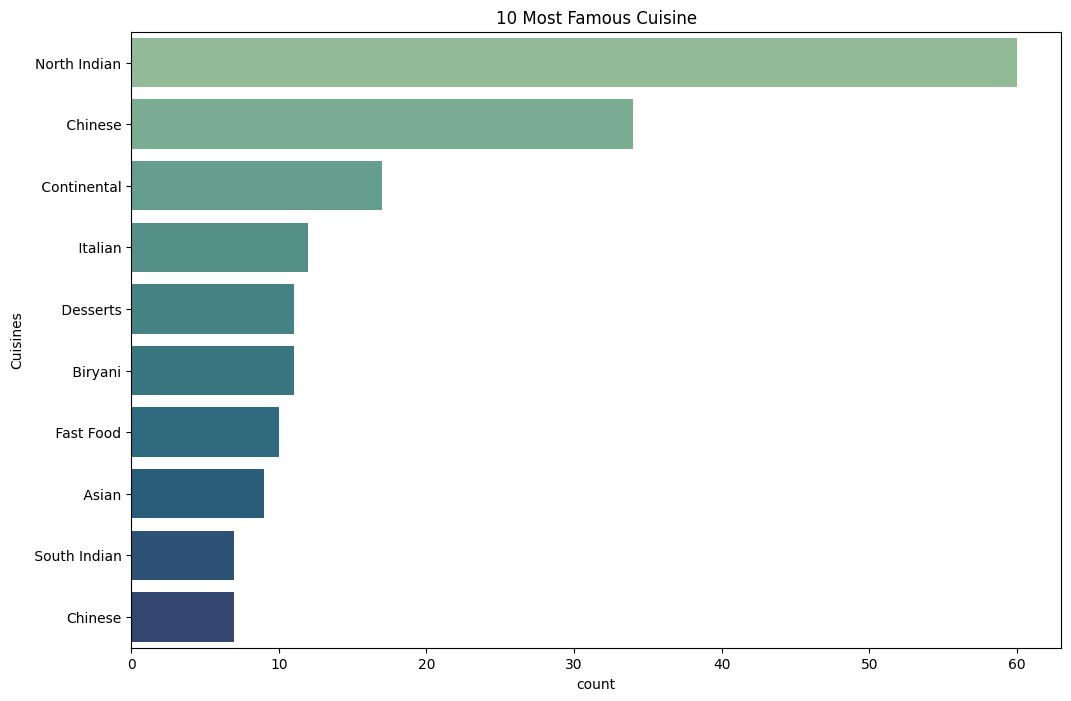

In [ ]:
plt.rcParams['figure.figsize']= (12,8)
sns.barplot(x='count', y='Cuisines', data=cuisine_.sort_values(ascending=False, by='count')[:10],palette='crest')
plt.title('10 Most Famous Cuisine')
plt.show()

#### Chart - 6

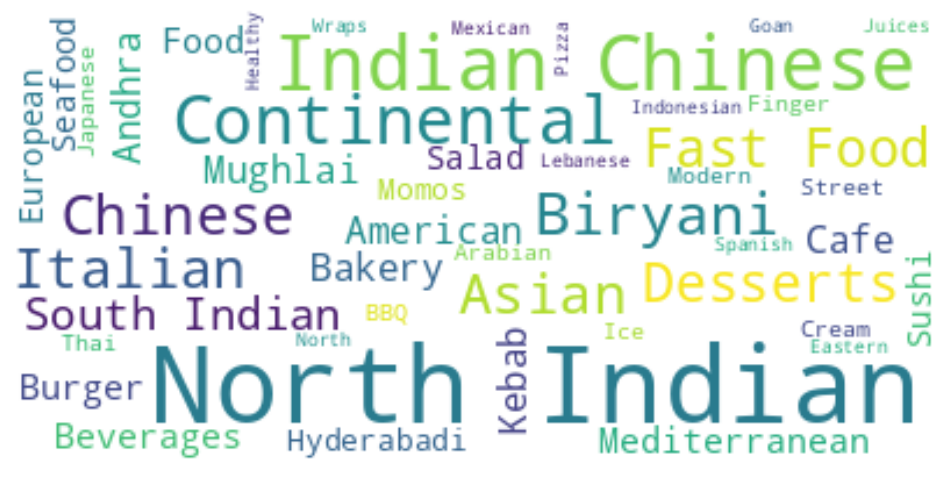

In [ ]:
#CREATING WORDCLOUD FOR CUISINES

plt.figure(figsize=(12,10))
df_word_cloud = cuisine_df['Cuisines']
text = " ".join(word for word in df_word_cloud)

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Chart - 7

(-0.5, 1399.5, 1399.5, -0.5)

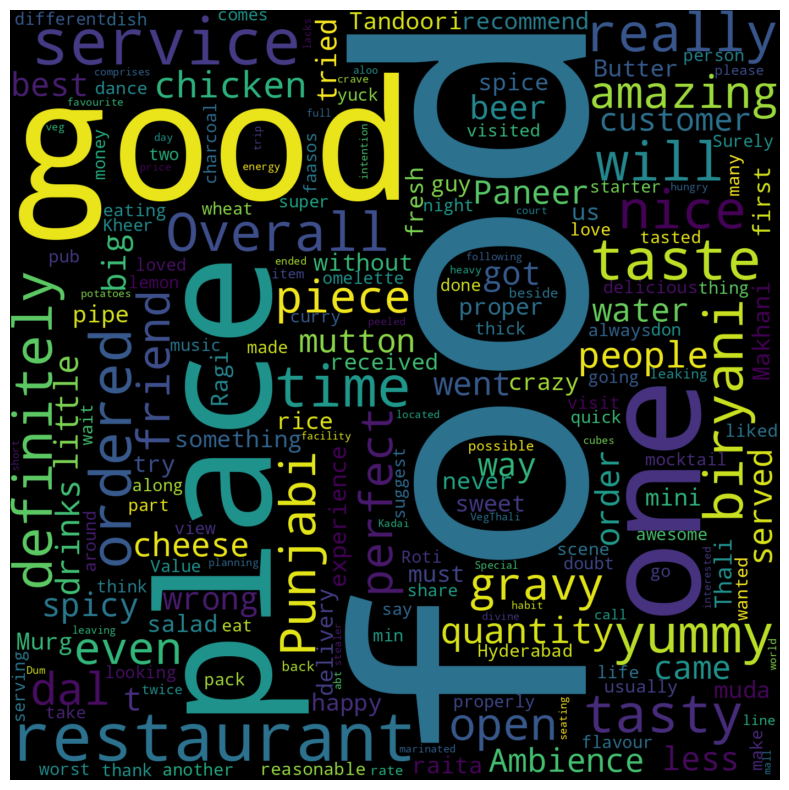

In [ ]:
# Creating word cloud for reviews
plt.figure(figsize=(15,10))
text = " ".join(name for name in review.sort_values('Review',ascending=False).Review[:30])

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

#### Chart - 8

In [ ]:
# Check out for top collections
top_collections = hotel['Collections'].value_counts().reset_index()
top_collections.rename(columns={'index': 'Collection', 'Collections': 'Count'}, inplace=True)
top_collections

,Collection,Count
0,Food Hygiene Rated Restaurants in Hyderabad,4
1,Great Buffets,2
2,Hyderabad's Hottest,2
3,New on Gold,2
4,Veggie Friendly,2
5,Trending This Week,2
6,"Sunday Brunches, Great Breakfasts, Function Ve...",1
7,"Function Venues, Regional Favorites",1
8,Pan-Asian Delicacies,1
9,"Veggie Friendly, Terrific Thalis",1


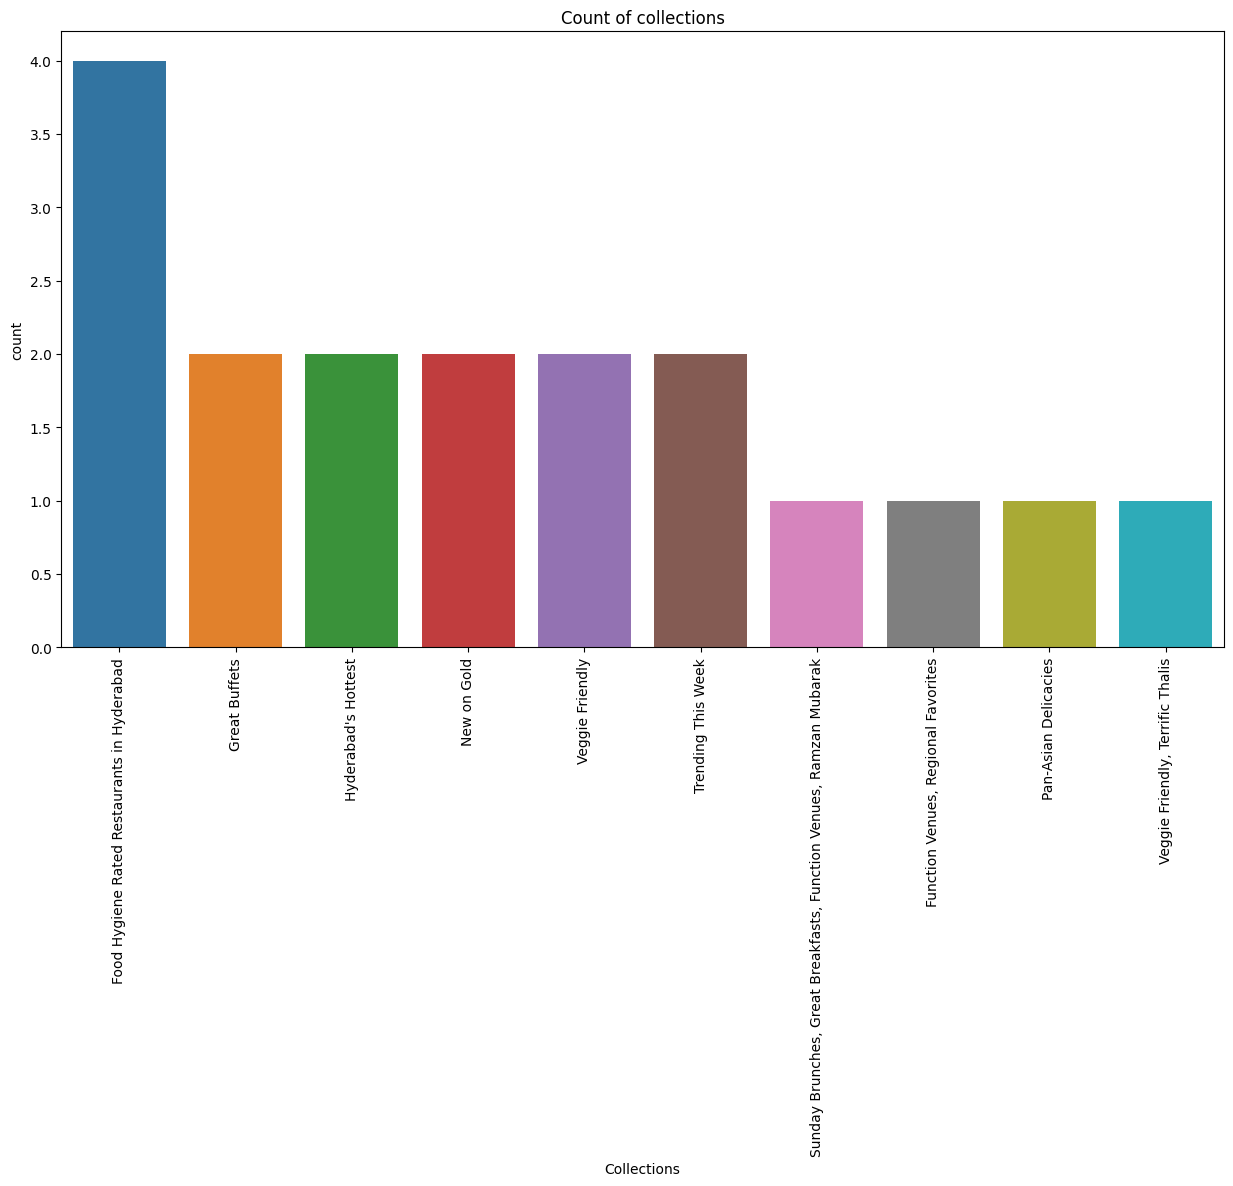

In [ ]:
#plot for collection count
plt.figure(figsize = (15,8))
sns.countplot(x='Collections',data=hotel,order=hotel.Collections.value_counts().head(10).index)
plt.title('Count of collections')
plt.xticks(rotation = 90)
plt.show()

#### Chart - 9

In [ ]:
#numerical columns for hotel dataset
num_cols_hotel = ['Cost', 'No_of_cuisine']

#numerical columns for review dataset
num_cols_review = ['Rating', 'Pictures', 'No_of_reviews', 'Followers']

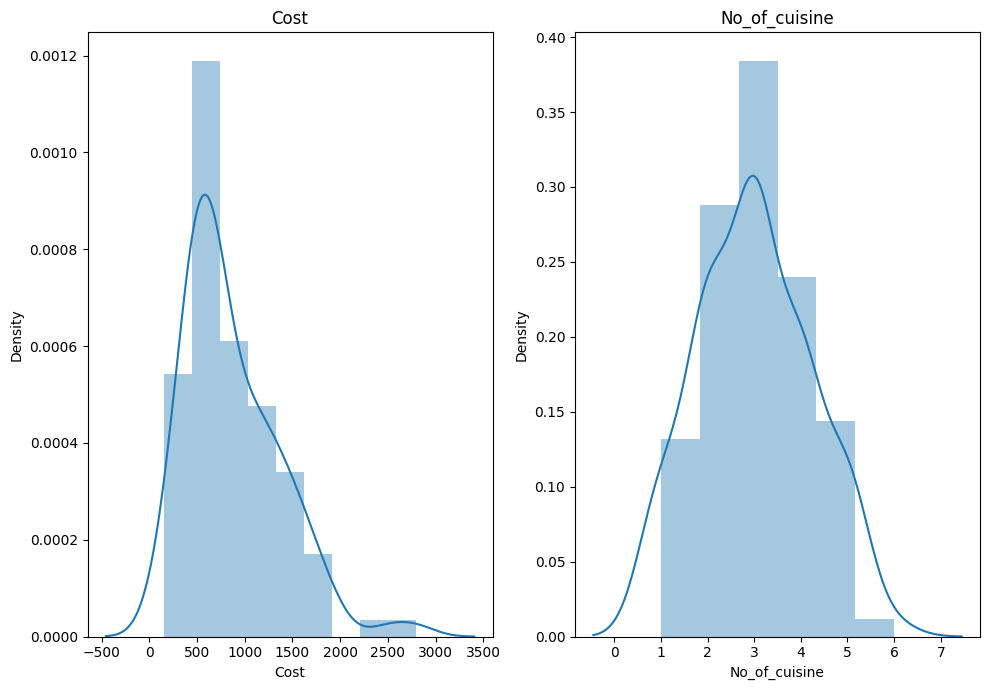

In [ ]:
# See the distribution of numerical features

#Distribution plot for hotel dataset
n=1
plt.figure(figsize=(10,7))
for col in num_cols_hotel:
   plt.subplot(1,2,n)
   n+=1
   sns.distplot(hotel[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

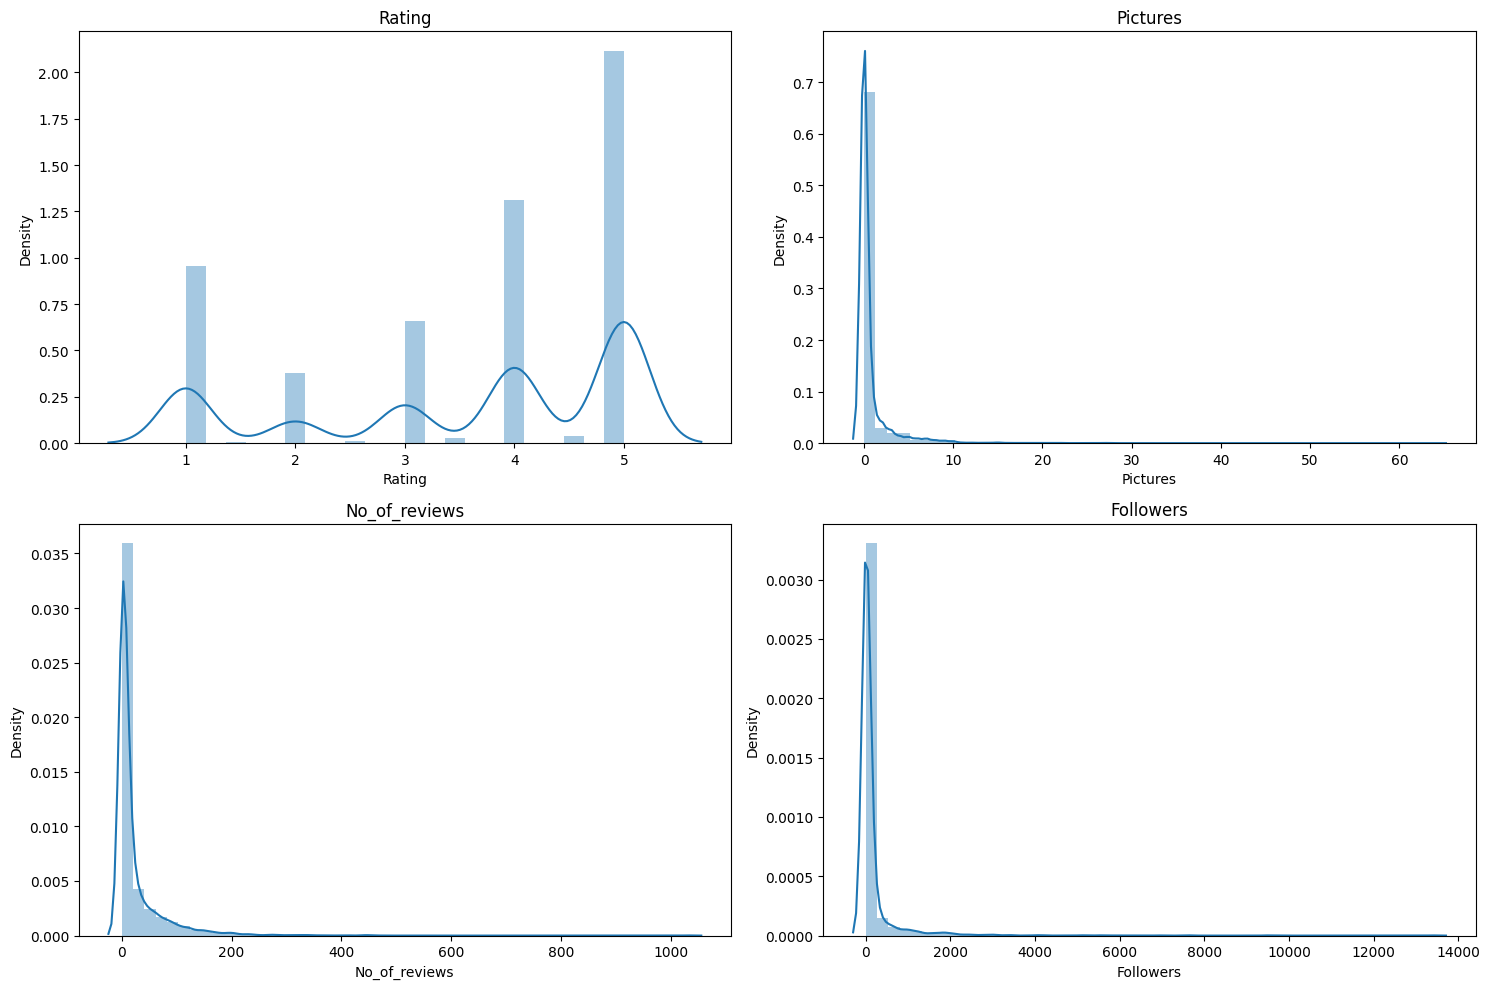

In [ ]:
  #Distribution plot
n=1
plt.figure(figsize=(15,10))
for col in num_cols_review:
   plt.subplot(2,2,n)
   n+=1
   sns.distplot(review[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of numerical columns.

##### 2. What is/are the insight(s) found from the chart?

Hotel Dataset: Cost is right skewed while Number of cuisine is normally distributed.

----
Review dataset : Pictures, No_of_reviews and followers are right skewed.


#### Chart - 10

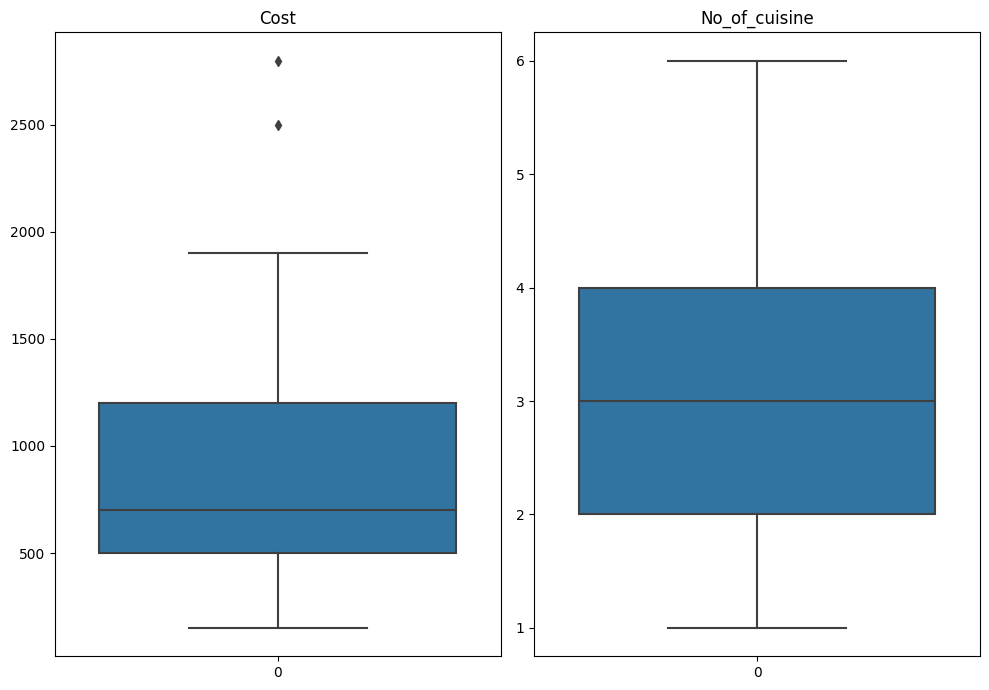

In [ ]:
# boxplot plot for hotel dataset
n=1
plt.figure(figsize = (10,7))
for col in num_cols_hotel:
   plt.subplot(1,2,n)
   n+=1
   sns.boxplot(hotel[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()

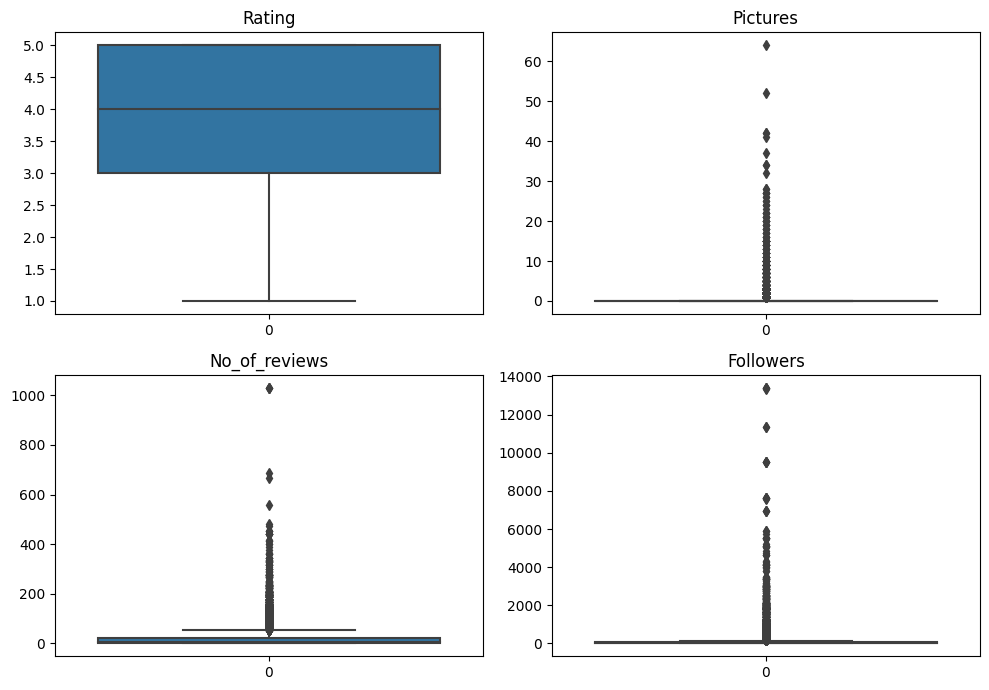

In [ ]:
#Box plot for review dataset
n=1
plt.figure(figsize = (10,7))
for col in num_cols_review:
   plt.subplot(2,2,n)
   n+=1
   sns.boxplot(review[col])
   plt.title(col)
   plt.tight_layout()
  # plt.show()